In [81]:
import yfinance as yf
import pandas as pd

We need to get a ticker for a particular stock that we want to track 
So in this example, we have S&P 500

In [82]:
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(period="max") #all data from the stock index

sp500_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-08 00:00:00-04:00,5168.979980,5191.950195,5165.859863,5187.669922,3842100000,0.0,0.0
2024-05-09 00:00:00-04:00,5189.029785,5215.299805,5180.410156,5214.080078,3727370000,0.0,0.0
2024-05-10 00:00:00-04:00,5225.490234,5239.660156,5209.680176,5222.680176,3617900000,0.0,0.0


So the history of the index comes in a pandas dataframe. 

So before we start doing anything, let us examine the data

In [83]:
sp500_data.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-05-01 00:00:00-04:00', '2024-05-02 00:00:00-04:00',
               '2024-05-03 00:00:00-04:00', '2024-05-06 00:00:00-04:00',
               '2024-05-07 00:00:00-04:00', '2024-05-08 00:00:00-04:00',
               '2024-05-09 00:00:00-04:00', '2024-05-10 00:00:00-04:00',
               '2024-05-13 00:00:00-04:00', '2024-05-14 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24208, freq=None)

The index for this dataframe is given in datetime format, so this will allow us to manipulate and slice the data accordingly

So before we start manipulating the data, let us find a way to visualize it

<Axes: xlabel='Date'>

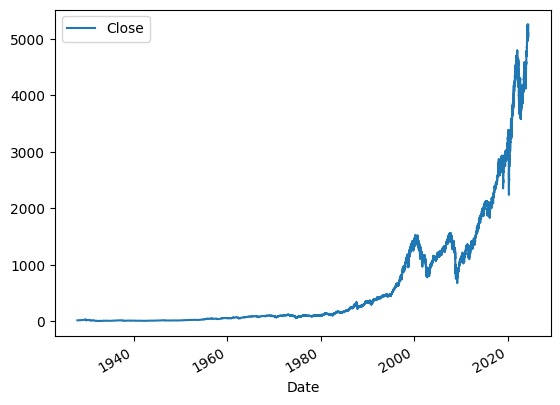

In [84]:
sp500_data.plot.line(y='Close', use_index=True)  

So looking at the data, we can actually remove some columns that are irrelevant to this analysis. So in the context of analysing S&P 500, we can remove the dividends and stock split columns as those are more catered to analysing individual stocks.

In [85]:
del sp500_data['Dividends']
del sp500_data['Stock Splits']

So after we cleaned the unnecessary data, we can start to layout what we want the machine learning algorithm to do.

So in our case, we can set a simple goal for the algorithm, to predict whether the stock price goes up or down the next day.

In [86]:
sp500_data['NextDay'] = sp500_data['Close'].shift(-1) #shift the close price to the next day for prediction
sp500_data['Objective'] = (sp500_data['NextDay'] > sp500_data['Close']).astype(int)

sp500_data

,Open,High,Low,Close,Volume,NextDay,Objective
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-05-08 00:00:00-04:00,5168.979980,5191.950195,5165.859863,5187.669922,3842100000,5214.080078,1
2024-05-09 00:00:00-04:00,5189.029785,5215.299805,5180.410156,5214.080078,3727370000,5222.680176,1
2024-05-10 00:00:00-04:00,5225.490234,5239.660156,5209.680176,5222.680176,3617900000,5221.419922,0


So most of the time, the more data there is, the better. But in the case of a stock market, the market shifts fundamentally over time due to policies and some of the old data can mislead the machine learning algorithm.

So we need to remove data that is too old

In [87]:
sp500_data = sp500_data.loc["1990-01-01":].copy()
sp500_data

,Open,High,Low,Close,Volume,NextDay,Objective
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-05-08 00:00:00-04:00,5168.979980,5191.950195,5165.859863,5187.669922,3842100000,5214.080078,1
2024-05-09 00:00:00-04:00,5189.029785,5215.299805,5180.410156,5214.080078,3727370000,5222.680176,1
2024-05-10 00:00:00-04:00,5225.490234,5239.660156,5209.680176,5222.680176,3617900000,5221.419922,0


Now that we finished processing the data, we can start training a machine learning model

In [88]:
from sklearn.ensemble import RandomForestClassifier

So for the initial model, we are going to be using a random forest classifier. The random forest classifier trains individual decision trees with randomised parameters before averaging the results from the decision tree. Because of this process, there wont be overfitting, where the model learns too much that it affects the accuracy. Not only that, it is a very efficient algorithm and it can pick up non-linear trends.

In [89]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state=1)

train = sp500_data.iloc[:-300] #as this is time series data, we cannot use cross validation as it will perform very well during training, but poorly during testing  
test = sp500_data.iloc[-300:]




predictors = ['Close','Volume','Open','High','Low']
model.fit(train[predictors], train['Objective'])

RandomForestClassifier(min_samples_split=100, random_state=1)

Now that we made a model, we can see its metrics and accuracy

In [90]:
from sklearn.metrics import precision_score,accuracy_score # can use whatever you want based on ur objectives

train_predictions = model.predict(train[predictors])
train_accuracy = accuracy_score(train['Objective'], train_predictions)

predictions = model.predict(test[predictors])
predictions = pd.Series(predictions, index=test.index)



precision_score(test['Objective'], predictions)

0.5354330708661418

<Axes: xlabel='Date'>

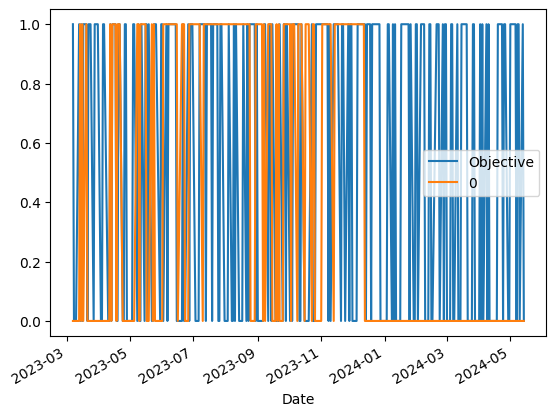

In [91]:
combined = pd.concat([test['Objective'], predictions], axis=1)
combined.plot()

Looking at this graph, we can see that the model has mostly predicted the upward trend but not the downwards trend. The prediction is also way off for the year of 2024.

So therefore we need to use a backtesting system that uses back propogation to test effectively

In [92]:
def predict(train,test,predictors,model):
    model.fit(train[predictors], train['Objective'])
    predictions = model.predict(test[predictors])
    predictions = pd.Series(predictions, index=test.index, name="Predictions")
    combined = pd.concat([test['Objective'], predictions], axis=1)
    return combined

In [93]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions = []
    for i in range(start,data.shape[0],step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        results = predict(train,test,predictors,model)
        all_predictions.append(results)
    return pd.concat(all_predictions)

In [94]:
predictions = backtest(sp500_data,model,predictors)
predictions["Predictions"].value_counts()

Predictions
0    3562
1    2596
Name: count, dtype: int64

In [95]:
precision_score(predictions['Objective'], predictions['Predictions'])

0.5288906009244992

The accuracy is still pretty bad, looking at the example below, if we woke up every day and sold the stock, it would have a better result than our algorithm

In [96]:
predictions["Objective"].value_counts()/predictions.shape[0]

Objective
1    0.534589
0    0.465411
Name: count, dtype: float64

But this is ok, as the backtesting system just ensures that the tests are accurate enough

So to improve the accuracy, we can add some predictors that we have excluded previously
So to achieve this, we can think from a human analyst perspective.
If you were a human, I would use the concept of rolling averages to predict prices

In [97]:
horizons = [2,5,60,250,1000]

The horizons is an array that contains periods that are of interest i.e. 2 trading days, 1 trading week(5 trading days), 3 trading months ...

In [98]:
new_predictors = []

for horizon in horizons:
    rolling_average = sp500_data.rolling(horizon).mean()

    ratio = f"Close_Ratio_{horizon}"
    sp500_data[ratio] = sp500_data['Close'] / rolling_average['Close']

    trend = f"Trend_{horizon}"
    sp500_data[trend] = sp500_data.shift(1).rolling(horizon).sum()['Objective']

    new_predictors += [ratio,trend]

sp500_data

,Open,High,Low,Close,Volume,NextDay,Objective,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-08 00:00:00-04:00,5168.979980,5191.950195,5165.859863,5187.669922,3842100000,5214.080078,1,0.999997,1.0,1.007389,4.0,1.013584,30.0,1.118576,138.0,1.248086,530.0
2024-05-09 00:00:00-04:00,5189.029785,5215.299805,5180.410156,5214.080078,3727370000,5222.680176,1,1.002539,1.0,1.006658,4.0,1.017879,31.0,1.123221,139.0,1.253749,531.0
2024-05-10 00:00:00-04:00,5225.490234,5239.660156,5209.680176,5222.680176,3617900000,5221.419922,0,1.000824,2.0,1.004637,4.0,1.018822,31.0,1.124010,140.0,1.255138,531.0


As you can see, there is quite a few NaNs. It is because when pandas cannot find enough days or rows to fill the horizon values, it will just return NaN.
So lets clean the data

In [99]:
sp500_data = sp500_data.dropna()
sp500_data

,Open,High,Low,Close,Volume,NextDay,Objective,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-07 00:00:00-04:00,5187.200195,5200.229980,5178.959961,5187.700195,3987890000,5187.669922,0,1.000671,2.0,1.014062,4.0,1.014137,30.0,1.119596,139.0,1.248765,531.0
2024-05-08 00:00:00-04:00,5168.979980,5191.950195,5165.859863,5187.669922,3842100000,5214.080078,1,0.999997,1.0,1.007389,4.0,1.013584,30.0,1.118576,138.0,1.248086,530.0
2024-05-09 00:00:00-04:00,5189.029785,5215.299805,5180.410156,5214.080078,3727370000,5222.680176,1,1.002539,1.0,1.006658,4.0,1.017879,31.0,1.123221,139.0,1.253749,531.0


So now that we have these improved metrics that we can use, let us improve our model

In [100]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50,random_state=1)

In [101]:
def predict(train,test,predictors,model):
    model.fit(train[predictors], train['Objective'])
    predictions = model.predict_proba(test[predictors])[:,1] #returns probability
    predictions[predictions >= 0.6] = 1 #setting the probability threshold
    predictions[predictions < 0.6] = 0
    predictions = pd.Series(predictions, index=test.index, name="Predictions")
    combined = pd.concat([test['Objective'], predictions], axis=1)
    return combined

In [102]:
predictions = backtest(sp500_data,model,new_predictors)
predictions["Predictions"].value_counts()

Predictions
0.0    4322
1.0     835
Name: count, dtype: int64

So now that our data have changed quite a bit, let us see the precision score

In [103]:
precision_score(predictions['Objective'], predictions['Predictions'])

0.5736526946107784

Yes, our model has improved quite a bit and to a point where you can make money with it. However, there is still much more that can be done 

TODO:
Add in influence from news data
Add focus on key components on s&p 500
Increasing resolution of data